# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Identify the strength of GPA, GRE and undergraduate school prestige in determining likelihood of admission to UCLA graduate school.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 
The data includes four variables, summarized in the below data dictionary:

Variable | Description | Type of Variable
---| ---| ---
admit | 1 = admitted 0 = not admitted | categorical
gre | GRE score | float
gpa | Grade Point Average | float
rank | rank of an applicant's undergraduate alma mater, 1 = highest 4 = lowest | categorical

The data was cleaned by removing all entries with null values.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [2]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()
dummy_ranks = pd.get_dummies(df.prestige)
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
dummy_ranks
cols_to_keep = ['admit', 'gre', 'gpa']
df_clean = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])

table_1 = pd.pivot_table(df_clean, values=['gpa','gre'], columns=['admit'], aggfunc='mean')
table_1

admit,0,1
gpa,3.347159,3.489206
gre,573.579336,618.571429


In [3]:
table_2 = pd.pivot_table(df_clean, values=['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4'], columns=['admit'], aggfunc='sum')
table_2

admit,0,1
prestige_1,28,33
prestige_2,95,53
prestige_3,93,28
prestige_4,55,12


### Methods: Write up the methods used in your analysis

Answer: We used an ordinary least squares linear regression to assess each covariate's correlation with the outcome.

### Results: Write up your results

Answer: each covariate is a significant predictor of admit. 

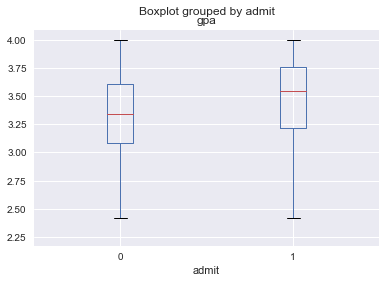

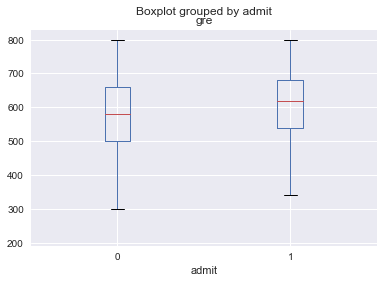

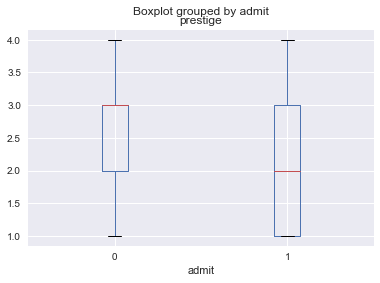

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.boxplot(column='gpa', by='admit')
df.boxplot(column='gre', by='admit')
df.boxplot(column='prestige', by='admit')

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: Each of the covariates, gpa, gre and prestige are significant predictors of admission to UCLA graduate school. 

A key next step would be to test our model and see how well it does at predicting admission status. 

In the future, I would look to examine other covariates (e.g., how this varies by program of study or how this varies by demographc information like gender). 